## Data Sanity Check 

#### Combining the Directory and File Name 

In [1]:
import os

data_dir = "Court_Room_Data/Train" # Path to Training Folder
vid_file = "trial_lie_018.mp4"  # Randomly Selected File 

video_path = os.path.join(data_dir, vid_file) # Combing Directory and File Name 

print("Video path:", video_path) # Combined Directory and File Name 
print("Exists:", os.path.exists(video_path)) # Checks if the Path and File exists 

Video path: Court_Room_Data/Train/trial_lie_018.mp4
Exists: True


#### Video Metadata Extraction

In [2]:
import cv2 
import numpy as np

vid=cv2.VideoCapture(video_path) # Using cv2 to access the existing video
fps=vid.get(cv2.CAP_PROP_FPS) # Calculating FPS using cv2
frame_count=int(vid.get(cv2.CAP_PROP_FRAME_COUNT)) # Calculating the Frame Count using cv2
duration = frame_count / fps if fps > 0 else 0 # Video Duration wrt Frame Count

vid.release()

In [3]:
print(f"FPS: {fps}, Frame Count: {frame_count}, Video Duration: {duration}")

FPS: 29.97002997002997, Frame Count: 1044, Video Duration: 34.8348


#### Displaying the Frames 

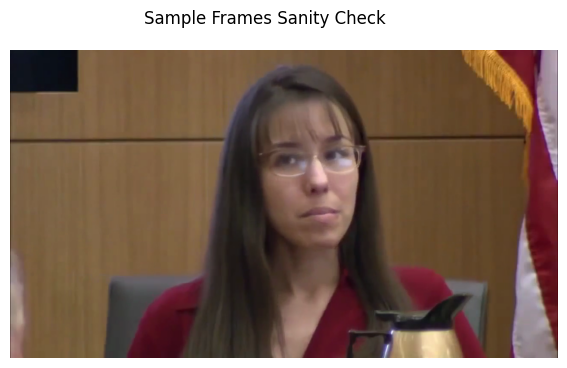

In [4]:
import matplotlib.pyplot as plt

vid=cv2.VideoCapture(video_path) # Accessing the Video 

frames=[] # Creating a list for Frames 
n=10  # Specifying the number of Frames 
indices = np.linspace(0, frame_count-1, n, dtype=int)  # Frame Indices

index=0 # Current Frame 
all_idx=set(indices) # All frame indices 

while vid.isOpened(): # Iterating Frame by Frame
    
    status,frame=vid.read() # Extracting Frame and Status
    
    if not status: # If Extraction Status Fails 
        break # Break
    
    if index in all_idx: # Iterating through all the Indices 
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # Converting to RGB
        frames.append(frame_rgb) # Appending Frame in the List 
    index+=1    # Updating the Index
    
    vid.release() # Releasing the Video 
    
# Displaying the Frame 

plt.figure(figsize=(15, 4))
for i, f in enumerate(frames):
    plt.subplot(1, len(frames), i+1)
    plt.imshow(f)
    plt.axis("off")
plt.suptitle("Sample Frames Sanity Check")
plt.show()
        

#### Extracting the Audio and it's Metadata

In [5]:
import librosa # Python's Audio Library

audio,sr=librosa.load(video_path,sr=None) # Loading the audio from video file

sample_rate=sr # Audio's Sample Rate
duration=len(audio) / sr # Audio's Duration

/var/folders/sp/zq08zqpj3dl_85f88dk5x16m0000gn/T/ipykernel_34688/2955807287.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio,sr=librosa.load(video_path,sr=None) # Loading the audio from video file
/Users/lakshyasantani/Desktop/Fake Interview Detection using Multimodal AI/Model Reproduction/deception_detection_ai/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [6]:
print(f"Sample Rate {sample_rate}, Duration {duration} seconds")

Sample Rate 44100, Duration 34.59628117913832 seconds


#### Displaying the Audio Waveform

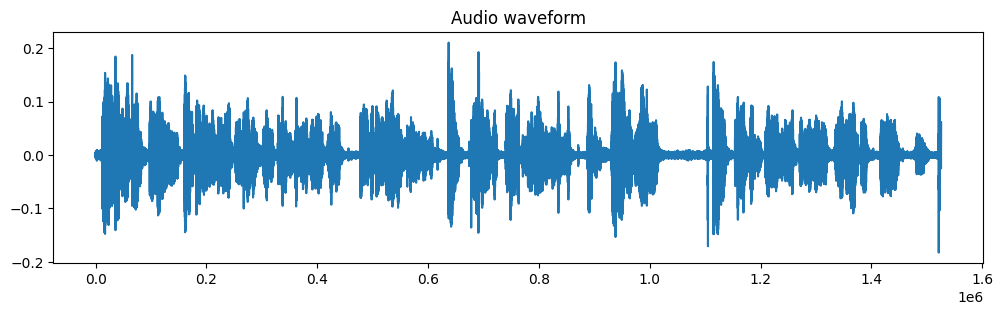

In [7]:
# Displaying the Audio Waveform 

plt.figure(figsize=(12,3))
plt.plot(audio)
plt.title("Audio waveform")
plt.show()

In [8]:
from IPython.display import Audio

Audio(audio, rate=sr) # Listening the Audio

#### Labelling the Files (Truth or Lie)

In [9]:
def assign_label(filename):
    if "lie" in filename.lower():
        return 1  # Deceptive
    elif "truth" in filename.lower():
        return 0  # Truthful
    else:
        return None

label = assign_label(video_path)

print("Assigned label:", label, "(1=Lie, 0=Truth)")

Assigned label: 1 (1=Lie, 0=Truth)


#### Verifying the Shapes

In [10]:
mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
print("MFCC shape:", mfcc.shape)

MFCC shape: (13, 2980)


In [11]:
sample_frame = frames[0]
print("Frame shape:", sample_frame.shape)

Frame shape: (720, 1280, 3)
